# **Análise Geográfica, Demográica e Econômica do Brasil**

Nesta Análise, foi realizado o trabalho com dados geográficos, demográficos e econômicos do Brasil. A ideia consitia em manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém **informações sobre estados (nome, sigla e região)**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Foi utilizado o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Os dados extraídos foram salvos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Obs**: Foi utilizado o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(file = 'D:\\Curso EBAC\\Módulo 13 - Data Wrangling II\\estados-bruto.xml', mode = 'r', encoding= 'utf8'), 'lxml')

In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [2]:
# manipulando os dados

ids = []
nome = []
idCapital = []
sigla = []
regiao = []

for estados in fonte.find_all('estado'):
  id_aux = str(estados.find('id')).strip('<id>,</id>')
  nome_aux = str(estados.find('nome')).strip('<nome>,</nome')
  idCapital_aux = str(estados.find('idcapital')).strip('<idcapital>,</idcapital')
  sigla_aux = str(estados.find('sigla')).strip('<sigla>,</sigla>')
  regiao_aux = str(estados.find('regiao')).strip('<regiao>,</regiao')

  ids.append(int(id_aux))
  nome.append(nome_aux)
  idCapital.append(int(idCapital_aux))
  sigla.append(sigla_aux)
  regiao.append(regiao_aux)




In [69]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# Exportar os dados em arquivo CSV.

with open(file='D:\Curso EBAC\Módulo 13 - Data Wrangling II/'+NOME_ARQUIVO_DESTINO, mode='w', encoding= 'utf8') as arquivo:
  estados = csv.writer(arquivo, delimiter = ';')
  estados.writerows([['estado', 'sigla', 'regiao']] + list(map(lambda nome_ext,sigla_ext,regiao_ext: [nome_ext]+[sigla_ext]+[regiao_ext],nome,sigla,regiao)))


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil.Foi utilizado o pacote **Python `pandas`** para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Os dados extraidos foram salvos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [3]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [4]:
# visualize os resultados

fonte

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [39]:
# manipule os dados

# continue o codigo aqui

cidades_2010 = fonte.query('Censo > 2009')
cidades_2010 = fonte[['UF', 'nome','PIB', 'Pop_est_2009','PIB_percapita']]
cidades_2010['nome'].fillna('')
cidades_2010[cidades_2010['nome'].isnull()]


,UF,nome,PIB,Pop_est_2009,PIB_percapita
3384,PERNAMBUCO,NaN,86340.601562,19026,4538.029785


In [40]:
#Tratamento de retirar os acentos dos estados

cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'PARANA' if uf=='PARANÁ' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'AMAPA' if uf=='AMAPÁ' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'ESPIRITO SANTO' if uf=='ESPÍRITO SANTO' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'MARANHAO' if uf=='MARANHÃO' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'PARAIBA' if uf=='PARAÍBA' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'PIAUI' if uf=='PIAUÍ' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'RONDONIA' if uf=='RONDÔNIA' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'CEARA' if uf=='CEARÁ' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'SAO PAULO' if uf=='SÃO PAULO' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'PARA' if uf=='PARÁ' else uf)
cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'GOIAS' if uf=='GOIÁS' else uf)

C:\Users\joyce\AppData\Local\Temp\ipykernel_25512\188289824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'PARANA' if uf=='PARANÁ' else uf)
C:\Users\joyce\AppData\Local\Temp\ipykernel_25512\188289824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_2010['UF'] = cidades_2010['UF'].apply(lambda uf: 'AMAPA' if uf=='AMAPÁ' else uf)
C:\Users\joyce\AppData\Local\Temp\ipykernel_25512\188289824.py:3: SettingWithCopyWarning: 
A value is trying

In [42]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

cidades_2010.to_csv(NOME_ARQUIVO_DESTINO, sep=';',index=False, header=['estado','cidade','populacao','pib','pib_percapita'])


### **1.3. Brasil** 

Foi utilizado o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` **em um único dataframe**. Escolhido o método combinação **outer** , para unir os dados dos arquivos **evitando perda de dados** no processo (não produzirá valores nulos `NaN`). Os dados foram salvos do dataframe no arquivo `brasil.csv`

In [52]:
# solução do exercício 1.3
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')
brasil_df = pd.merge(left=estados_df, right= cidades_df, on='estado',how='outer')

brasil_df.to_csv('brasil.csv',sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Foi utilizado o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [54]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv', sep=';')
brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5561,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5562,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5563,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5564,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise** 

Foi utilizado o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [71]:
# código para responder a pergunta
top10_max_df = brasil_df[['cidade', 'populacao']].groupby('cidade').agg('max').sort_values(by='populacao', ascending=False).iloc[0:10]
top10_max_df

,populacao
cidade,
São Paulo,389317152.0
Rio de Janeiro,175739344.0
Brasília,131487264.0
Curitiba,45762420.0
Belo Horizonte,44595204.0
Manaus,40486108.0
Porto Alegre,37787912.0
Salvador,32824228.0
Guarulhos,32473828.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [70]:
# código para responder a pergunta
menores_pib_df = brasil_df[['cidade', 'pib']].groupby('cidade').agg('min').sort_values(by=['pib']).iloc[0:5]
menores_pib_df

,pib
cidade,
Borá,837
Serra da Saudade,890
Anhanguera,1018
Araguainha,1115
Nova Castilho,1122


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [90]:
# código para responder a pergunta
sp_cid_top15 = brasil_df[['estado','cidade','pib']].groupby('cidade').agg('max').query('estado == "SAO PAULO"').sort_values(by=['pib'], ascending=False).iloc[0:15]
sp_cid_top15

,estado,pib
cidade,,
São Paulo,SAO PAULO,11037593
Guarulhos,SAO PAULO,1299283
Campinas,SAO PAULO,1064669
São Bernardo do Campo,SAO PAULO,810979
Osasco,SAO PAULO,718646
Santo André,SAO PAULO,673396
São José dos Campos,SAO PAULO,615871
Sorocaba,SAO PAULO,584313
Ribeirão Preto,SAO PAULO,563107


 - Qual é o PIB do estado de Santa Catarina?

In [83]:
# código para responder a pergunta
pib_sc_df = brasil_df[['estado','pib']].groupby('estado').agg('sum').query('estado == "SANTA CATARINA"')
pib_sc_df

,pib
estado,
SANTA CATARINA,6118743


 - Qual é o população da região sul?

In [85]:
# código para responder a pergunta

pop_sul = brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum').query('regiao == "SUL"')
pop_sul


,populacao
regiao,
SUL,5.356621e+08


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [88]:
# código para responder a pergunta
pib_per_mt = brasil_df[['estado', 'cidade', 'pib_percapita']].groupby('estado').agg('mean').query('estado == "MATO GROSSO DO SUL"').sort_values(by=['pib_percapita'], ascending=False)
pib_per_mt

,pib_percapita
estado,
MATO GROSSO DO SUL,14458.89686


 - Qual é a população do Brasil?

In [92]:
# código para responder a pergunta
pop_brasil_df = brasil_df[['populacao']].agg('sum')
pop_brasil_df

populacao    3.239525e+09
dtype: float64

### **2.3. Visualização** 

Foi utilizado o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gerar um gráfico de barras com as 10 cidades menos populosas do Brasil.

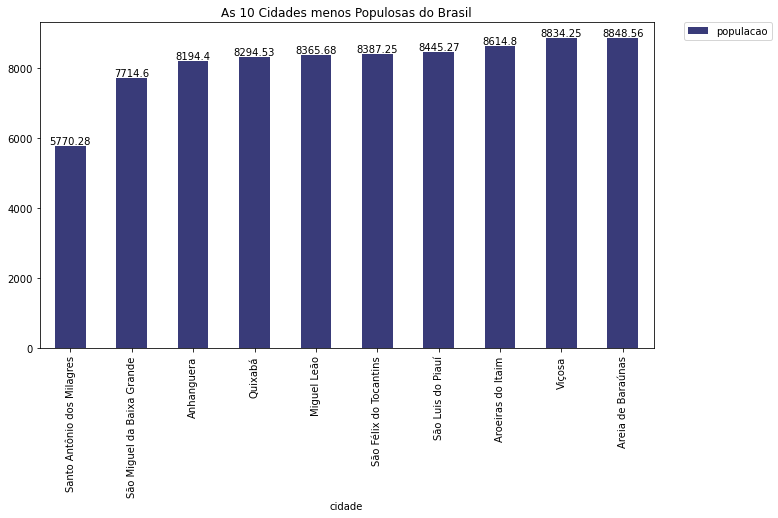

In [135]:
# código para gerar a visualização
import numpy as np
import matplotlib.pyplot as plt


ax = brasil_df[['cidade', 'populacao']].groupby('cidade').agg('min').sort_values(by=['populacao']).iloc[0:10].plot.bar(figsize=(11,6), colormap='tab20b')

ax.set_title('As 10 Cidades menos Populosas do Brasil')
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0.)
for container in ax.containers:
  ax.bar_label(container)

#handles, labels = ax.get_legend_handles_labels()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

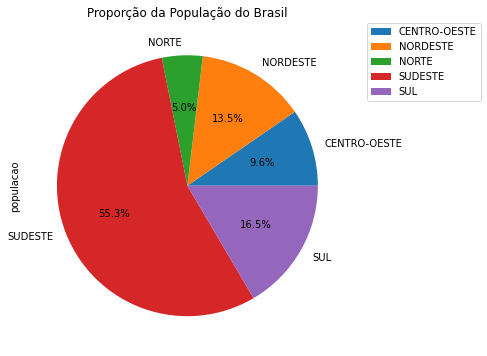

In [155]:
# código para gerar a visualização

ax = brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum').sort_values(by=['regiao']).plot.pie(y='populacao',figsize=(11,6), autopct='%.1f%%')

ax.set_title('Proporção da População do Brasil')
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0.)
